## Read cleant data

In [1]:
import pandas as pd

In [51]:
# Read cleant data
csv_path = 'Data/Cleansed/data_with_nltk.csv'
reviews_nltk = pd.read_csv(csv_path)

In [5]:
reviews_nltk.head(2)

,Unnamed: 0.1,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,...,DateTime,Popularity,Year,binary_score,CleantText,Text_SWR,nltk_ct_sa_pos,nltk_ct_sa_neg,nltk_ct_sa_neu,nltk_ct_sa
0,0,150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,...,2005-02-15 01:00:00,-1,2005,1,in june i saw a charming group of roses all be...,june saw charming group roses begin droop pepp...,0.144,0.035,0.821,0.8715
1,1,150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,4,1191456000,...,2007-10-04 02:00:00,0,2007,1,this is a fun way for children to learn their ...,fun way children learn months year learn poems...,0.158,0.000,0.842,0.7003


In [7]:
reviews_nltk.groupby('Score')['nltk_ct_sa_pos'].mean()

Score
1    0.098478
2    0.117968
3    0.143066
4    0.187635
5    0.220512
Name: nltk_ct_sa_pos, dtype: float64

In [29]:
reviews_nltk.groupby('Score')['nltk_ct_sa_neg'].mean()

Score
1    0.098907
2    0.079392
3    0.059583
4    0.041022
5    0.032772
Name: nltk_ct_sa_neg, dtype: float64

In [30]:
reviews_nltk.groupby('Score')['nltk_ct_sa_neu'].mean()

Score
1    0.802614
2    0.802641
3    0.797348
4    0.771341
5    0.746702
Name: nltk_ct_sa_neu, dtype: float64

In [35]:
reviews_nltk.groupby('Score')['nltk_ct_sa'].mean()

Score
1    0.027661
2    0.261161
3    0.480701
4    0.699947
5    0.766328
Name: nltk_ct_sa, dtype: float64

In [34]:
reviews_nltk.groupby('Score')['nltk_ct_sa'].median()

Score
1    0.0000
2    0.4155
3    0.7003
4    0.8591
5    0.8860
Name: nltk_ct_sa, dtype: float64

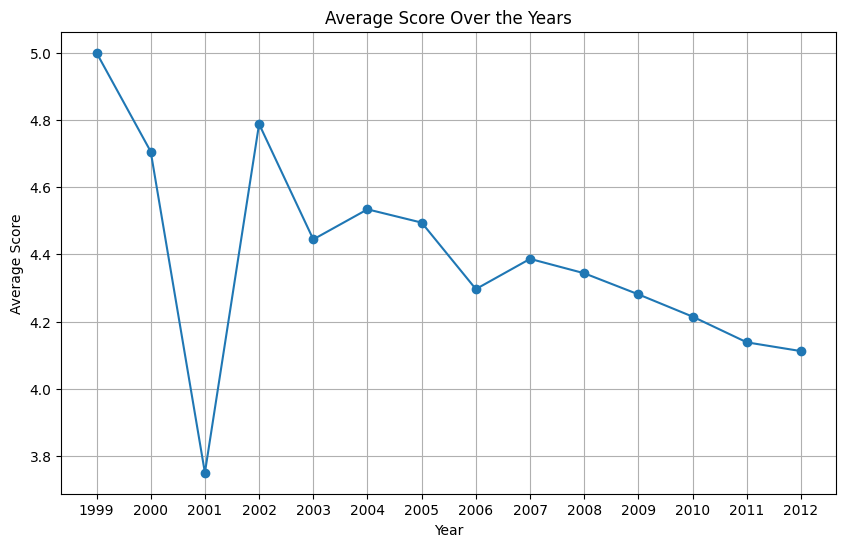

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Assuming 'data' is your DataFrame containing sentiment scores and a 'year' column
 
# Group the data by year and calculate the mean sentiment score for each year
sentiment_by_year = reviews_nltk.groupby('Year')['Score'].mean()
# sentiment_by_year = reviews_nltk.groupby('Year')['Score'].mean()
 
# Plot the sentiment scores over the years
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_year.index, sentiment_by_year.values, marker='o', linestyle='-')
plt.title('Average Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks(sentiment_by_year.index)  # Set x-axis ticks to match the years
plt.grid(True)
plt.show()

# Less satisfaction, quality of products decreases
# Score is correlated is correlated with NLTK Sentiment Analysis

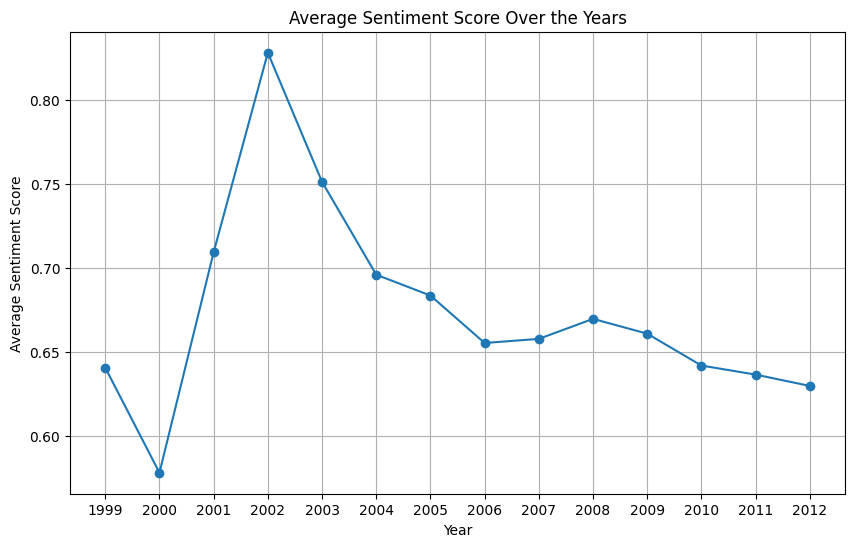

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Assuming 'data' is your DataFrame containing sentiment scores and a 'year' column
 
# Group the data by year and calculate the mean sentiment score for each year
sentiment_by_year = reviews_nltk.groupby('Year')['nltk_ct_sa'].mean()
# sentiment_by_year = reviews_nltk.groupby('Year')['Score'].mean()
 
# Plot the sentiment scores over the years
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_year.index, sentiment_by_year.values, marker='o', linestyle='-')
plt.title('Average Sentiment Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.xticks(sentiment_by_year.index)  # Set x-axis ticks to match the years
plt.grid(True)
plt.show()

# Less satisfaction, quality of products decreases
# Score is correlated is correlated with NLTK Sentiment Analysis3

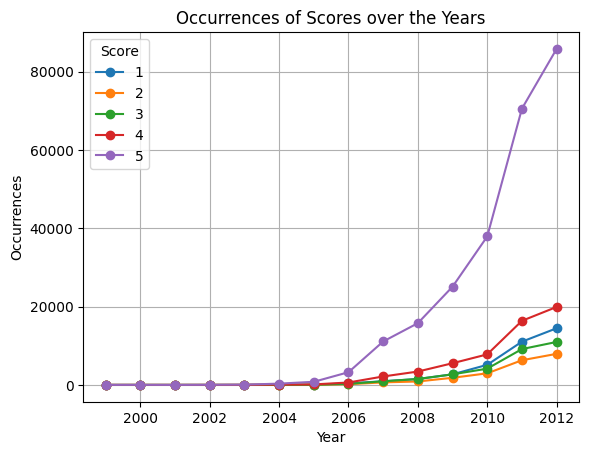

In [15]:
# Group by Year and Score, then count occurrences
score_counts = reviews_nltk.groupby(['Year', 'Score']).size().unstack(fill_value=0)

# Plot each score
score_counts.plot(kind='line', marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Occurrences')
plt.title('Occurrences of Scores over the Years')
plt.grid(True)
plt.legend(title='Score')
plt.show()

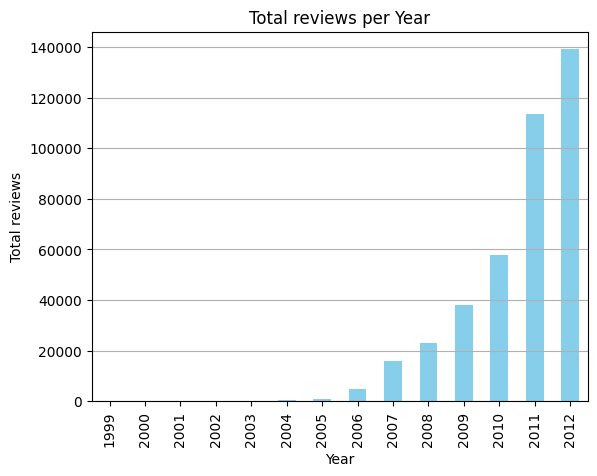

In [39]:
# Group by Year and count occurrences
year_counts = reviews_nltk.groupby('Year').size()

# Plot total rows per year
year_counts.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total reviews')
plt.title('Total reviews per Year')
plt.grid(axis='y')
plt.show()

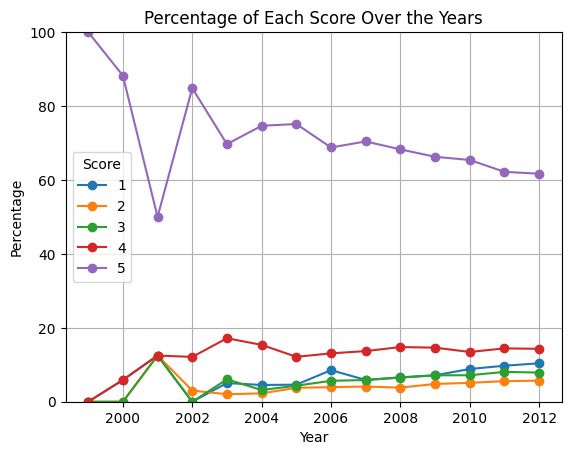

In [45]:
# Group by Year and Score, then count occurrences
score_counts = reviews_nltk.groupby(['Year', 'Score']).size().unstack(fill_value=0)

# Calculate percentage of each score for each year
score_percentages = score_counts.div(score_counts.sum(axis=1), axis=0) * 100

# Plot the percentage of each score over the years
score_percentages.plot(marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Each Score Over the Years')
plt.grid(True)
plt.legend(title='Score')
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.show()

In [81]:
# This returns the text reviews belonging to year and score
reviews_nltk.loc[(reviews_nltk['Year'] == 2012) & (reviews_nltk['Score'] == 5), 'Text_SWR']

21        title chicken soup rice author maurice sendak ...
30        set aside least hour day read son point consid...
33        remembered book childhood got kids good rememb...
37        product archer farms best drink mix ever mix f...
40        book easy read ingredients available stores un...
                                ...                        
393587    fts zero best sweetener ever tried aftertaste ...
393588    try sauce believe starts little sweet honey ta...
393589    bought hazelnut paste nocciola spread local sh...
393590    purchased product local store kids love quick ...
393591    purchased send son whos away college delivered...
Name: Text_SWR, Length: 85809, dtype: object

In [85]:
# This returns the dataframe belonging to year and score
pos = reviews_nltk[(reviews_nltk['Year'] == 2012) & (reviews_nltk['Score'] == 5)][0:25000]
neg =  reviews_nltk[(reviews_nltk['Year'] == 2012) & (reviews_nltk['Score'] == 1)][0:25000]

In [86]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt


def create_Word_Corpus(temp):
    words_corpus = ''
    for val in reviews_nltk[reviews_nltk['Year'] == 2012]['Text_SWR'][0:25000]:
        text = str(val).lower()
        tokens = []
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + ' ' + words
    return words_corpus
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

KeyboardInterrupt: 

In [78]:
# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [102]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
 
# Assuming 'df' is your DataFrame containing products, scores, and text
 
# Step 1: Filter the DataFrame to include only the rows corresponding to the top 10 products
# top_1000_products =reviews_nltk[reviews_nltk['Score'] == 2].groupby('ProductId')['Score'].mean().head(1000).index
top_1000_products =reviews_nltk.groupby('ProductId')['Score'].mean().head(1000).index
filtered_df = reviews_nltk[reviews_nltk['ProductId'].isin(top_1000_products)]
 
# Step 2: Concatenate the text data associated with these products
concatenated_text = ' '.join(filtered_df['Text_SWR'])
 
# Step 3: Tokenize the concatenated text into individual words
words = word_tokenize(concatenated_text)
 
# Step 4: Count the occurrences of each word
word_counts = Counter(words)
 
# Step 5: Select the most common words
common_words = word_counts.most_common(30)  # Select top 20 common words
 
# Display the common words
print("Top 30 common words among the text associated with top 1000 products:")
for word, count in common_words:
    print(f"{word}: {count}")

Top 30 common words among the text associated with top 1000 products:
not: 3262
food: 2113
one: 2101
like: 2088
good: 1578
great: 1439
get: 1245
product: 1245
would: 1244
dog: 1087
tea: 1050
cat: 1017
really: 983
love: 976
dont: 966
well: 958
little: 956
use: 947
time: 938
much: 900
flavor: 869
taste: 856
also: 851
hot: 837
even: 809
dogs: 800
trap: 800
first: 783
sauce: 765
ive: 714


Top 30 common words among the text associated with worst 1000 products:
not: 3262
food: 2113
one: 2101
like: 2088
good: 1578
great: 1439
get: 1245
product: 1245
would: 1244
dog: 1087
tea: 1050
cat: 1017
really: 983
love: 976
dont: 966
well: 958
little: 956
use: 947
time: 938
much: 900
flavor: 869
taste: 856
also: 851
hot: 837
even: 809
dogs: 800
trap: 800
first: 783
sauce: 765
ive: 714


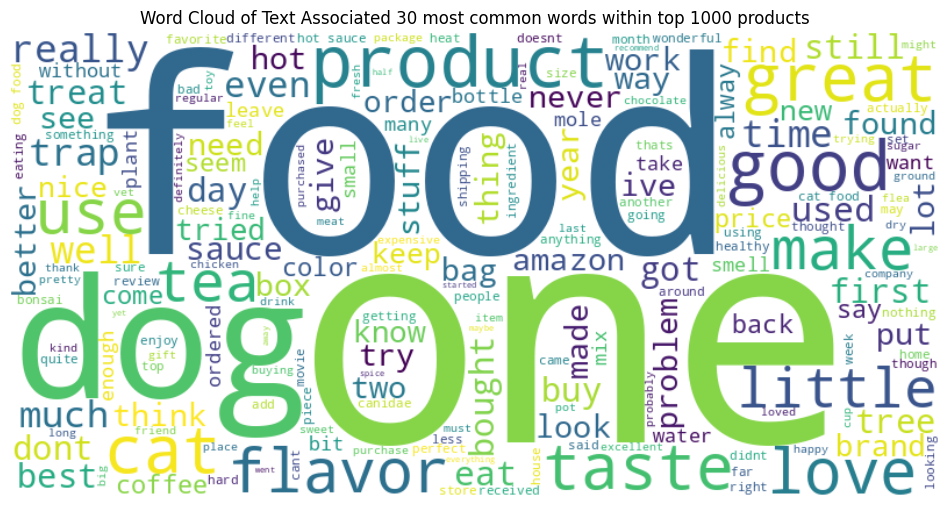

Top 30 common words among the text associated with worst 1000 products:
not: 1122
product: 524
like: 424
one: 376
would: 338
taste: 276
food: 243
buy: 209
good: 204
dont: 197
ordered: 193
amazon: 190
even: 189
get: 186
box: 177
tea: 170
order: 167
flavor: 166
item: 159
shipping: 157
price: 154
money: 148
never: 143
company: 140
received: 136
bought: 136
really: 135
bag: 134
time: 133
could: 120


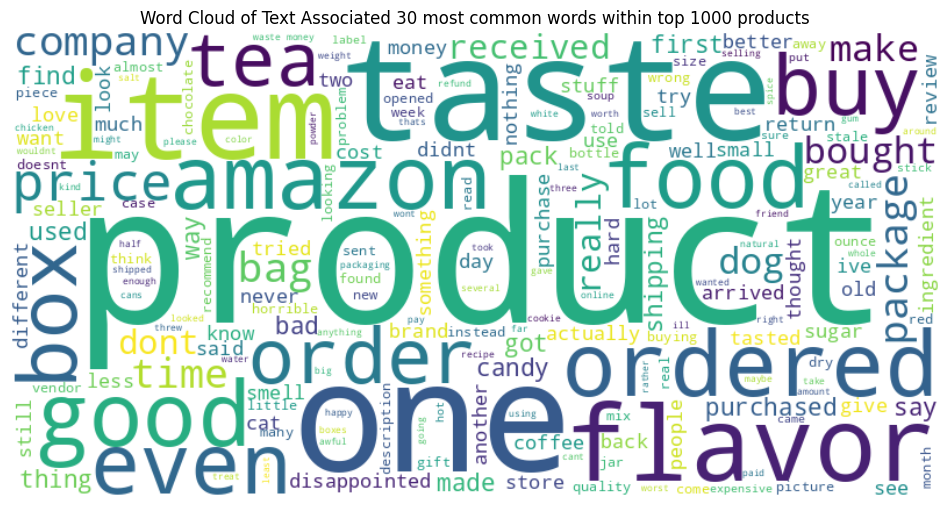

In [104]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

top_prods = reviews_nltk.groupby('ProductId')['Score'].mean().head(1000).index
bot_prods = reviews_nltk.groupby('ProductId')['Score'].mean().nsmallest(1000).index

prods = [top_prods, bot_prods]

for products in prods:
    # Assuming 'df' is your DataFrame containing products, scores, and text
     
    filtered_df = reviews_nltk[reviews_nltk['ProductId'].isin(products)]
     
    # Step 2: Concatenate the text data associated with these products
    concatenated_text = ' '.join(filtered_df['Text_SWR'])
     
    # Step 3: Tokenize the concatenated text into individual words
    words = word_tokenize(concatenated_text)
     
    # Step 4: Count the occurrences of each word
    word_counts = Counter(words)
     
    # Step 5: Select the most common words
    common_words = word_counts.most_common(30)  # Select top 20 common words
     
    # Display the common words
    print("Top 30 common words among the text associated with worst 1000 products:")
    for word, count in common_words:
        print(f"{word}: {count}")

    # Step 3: Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(concatenated_text)
     
    # Step 4: Plot the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Text Associated 30 most common words within top 1000 products')
    plt.show()

In [93]:
common_words

[('not', 1122),
 ('product', 524),
 ('like', 424),
 ('one', 376),
 ('would', 338),
 ('taste', 276),
 ('food', 243),
 ('buy', 209),
 ('good', 204),
 ('dont', 197),
 ('ordered', 193),
 ('amazon', 190),
 ('even', 189),
 ('get', 186),
 ('box', 177),
 ('tea', 170),
 ('order', 167),
 ('flavor', 166),
 ('item', 159),
 ('shipping', 157),
 ('price', 154),
 ('money', 148),
 ('never', 143),
 ('company', 140),
 ('received', 136),
 ('bought', 136),
 ('really', 135),
 ('bag', 134),
 ('time', 133),
 ('could', 120)]

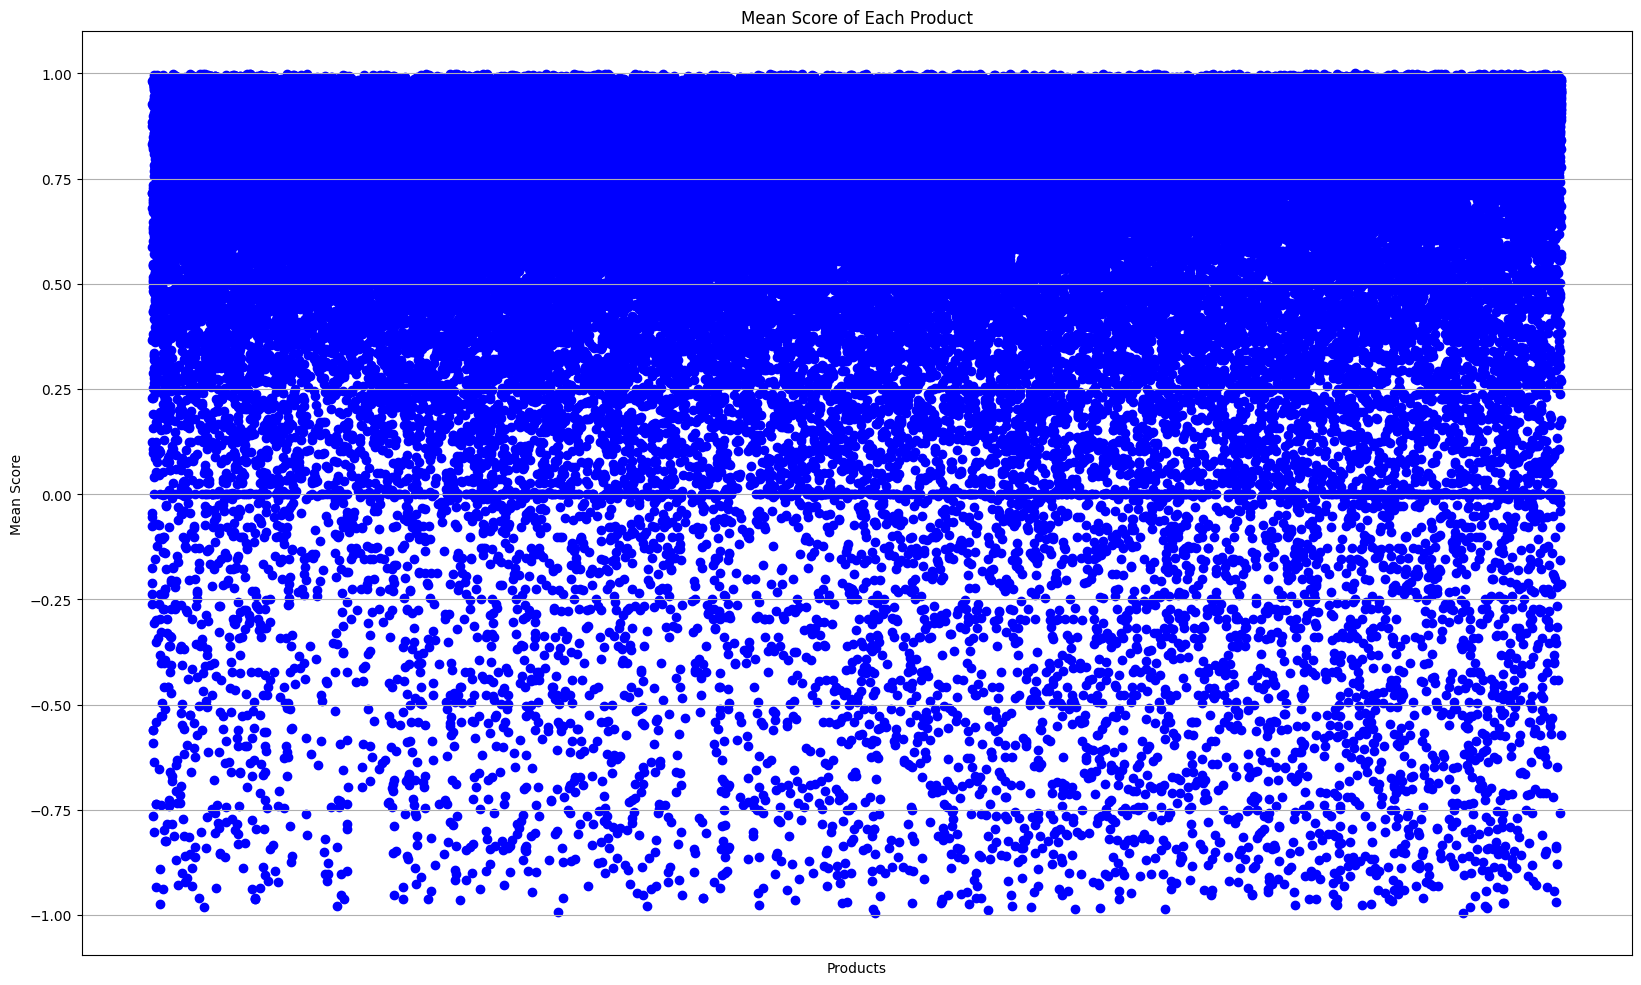

In [88]:
# Calculate the mean score for each product
product_means = reviews_nltk.groupby('ProductId')['nltk_ct_sa'].mean()

# Create a larger figure
plt.figure(figsize=(20, 12))

# Plot the mean score of each product as points without showing labels
plt.scatter(product_means.index, product_means.values, color='blue')

# Set labels and title
plt.xlabel('Products')
plt.ylabel('Sentiment')
plt.title('Sentiment of Each Product')
plt.grid(True)

# Hide x-axis labels
plt.xticks([])

plt.show()

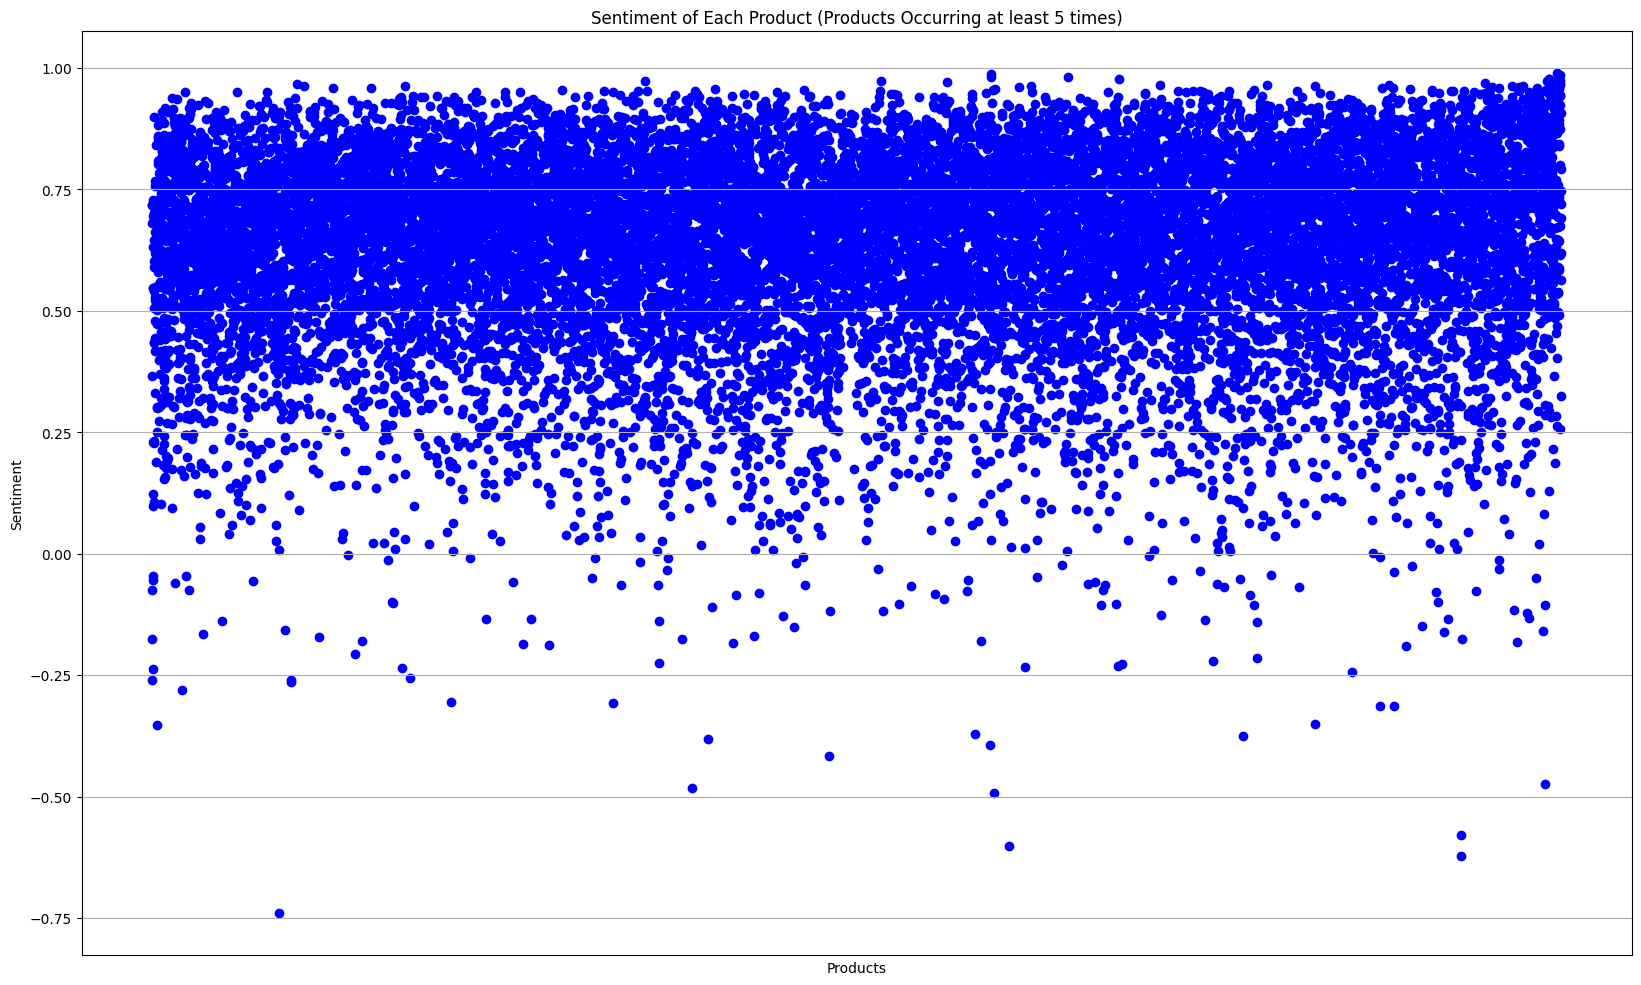

In [86]:
# Filter products occurring at least 10 times
product_counts = reviews_nltk['ProductId'].value_counts()
valid_products = product_counts[product_counts >= 5].index
reviews_filtered = reviews_nltk[reviews_nltk['ProductId'].isin(valid_products)]

# Calculate the mean score for each product
product_means = reviews_filtered.groupby('ProductId')['nltk_ct_sa'].mean()

# Create a larger figure
plt.figure(figsize=(20, 12))

# Plot the mean score of each product as points without showing labels
plt.scatter(product_means.index, product_means.values, color='blue')

# Set labels and title
plt.xlabel('Products')
plt.ylabel('Sentiment')
plt.title('Sentiment of Each Product (Products Occurring at least 5 times)')
plt.grid(True)

# Hide x-axis labels
plt.xticks([])

plt.show()

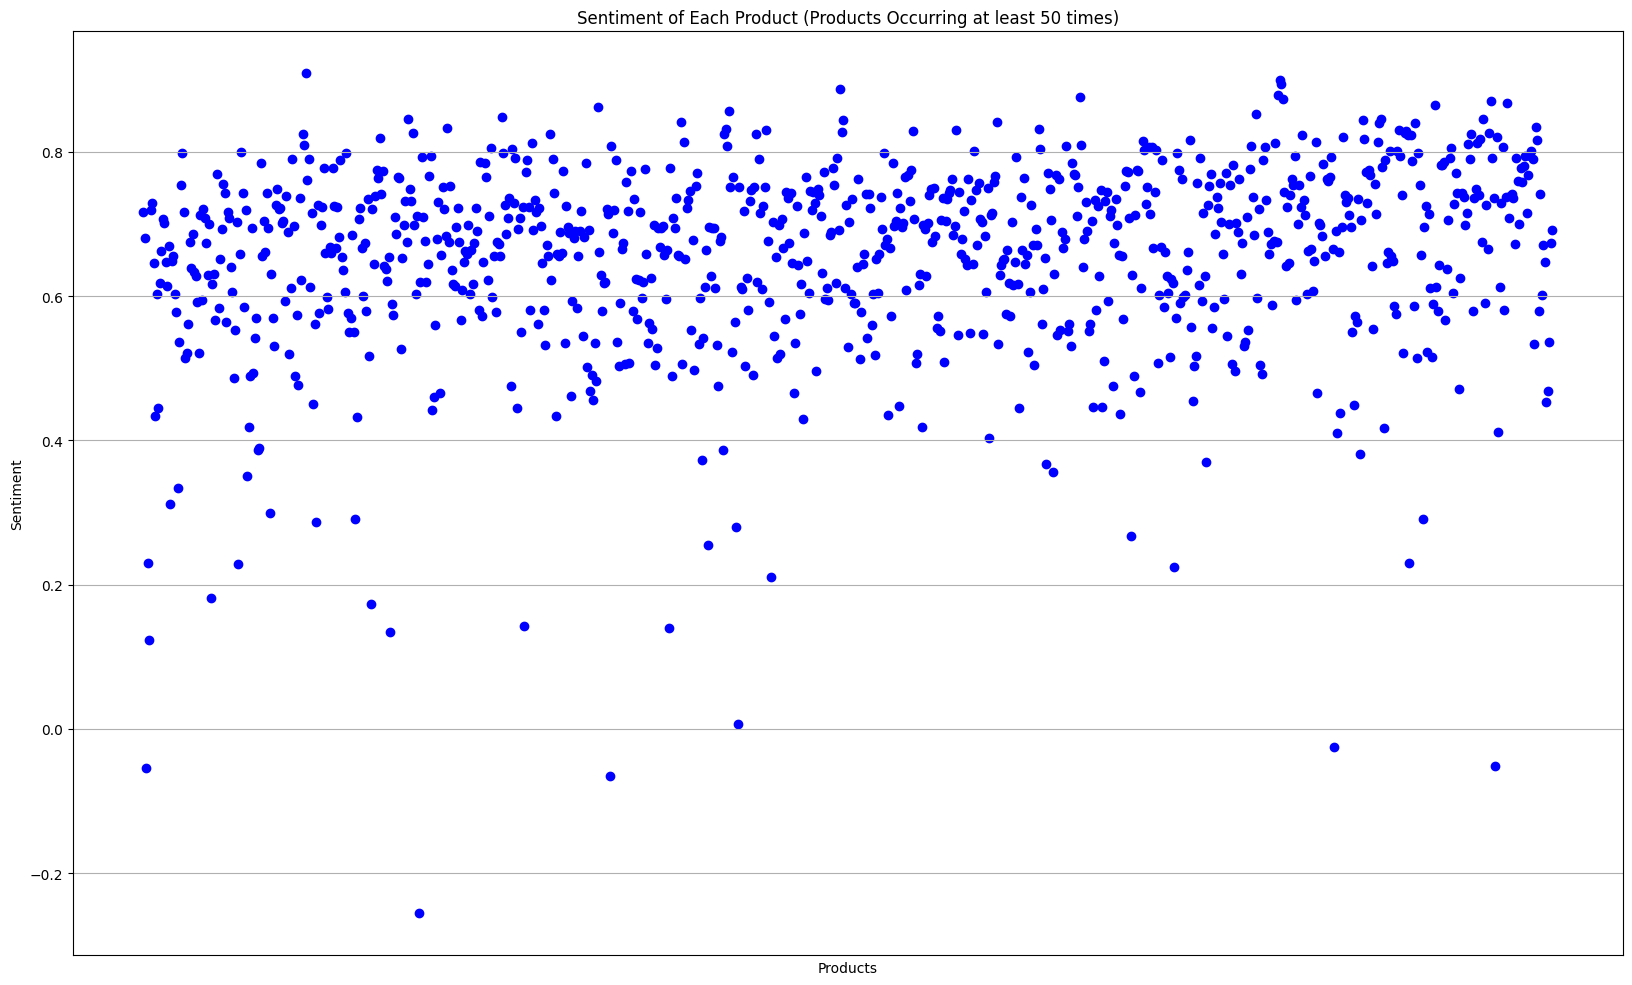

In [85]:
# Filter products occurring at least 10 times
product_counts = reviews_nltk['ProductId'].value_counts()
valid_products = product_counts[product_counts >= 50].index
reviews_filtered = reviews_nltk[reviews_nltk['ProductId'].isin(valid_products)]

# Calculate the mean score for each product
product_means = reviews_filtered.groupby('ProductId')['nltk_ct_sa'].mean()

# Create a larger figure
plt.figure(figsize=(20, 12))

# Plot the mean score of each product as points without showing labels
plt.scatter(product_means.index, product_means.values, color='blue')

# Set labels and title
plt.xlabel('Products')
plt.ylabel('Sentiment')
plt.title('Sentiment of Each Product (Products Occurring at least 50 times)')
plt.grid(True)

# Hide x-axis labels
plt.xticks([])

plt.show()

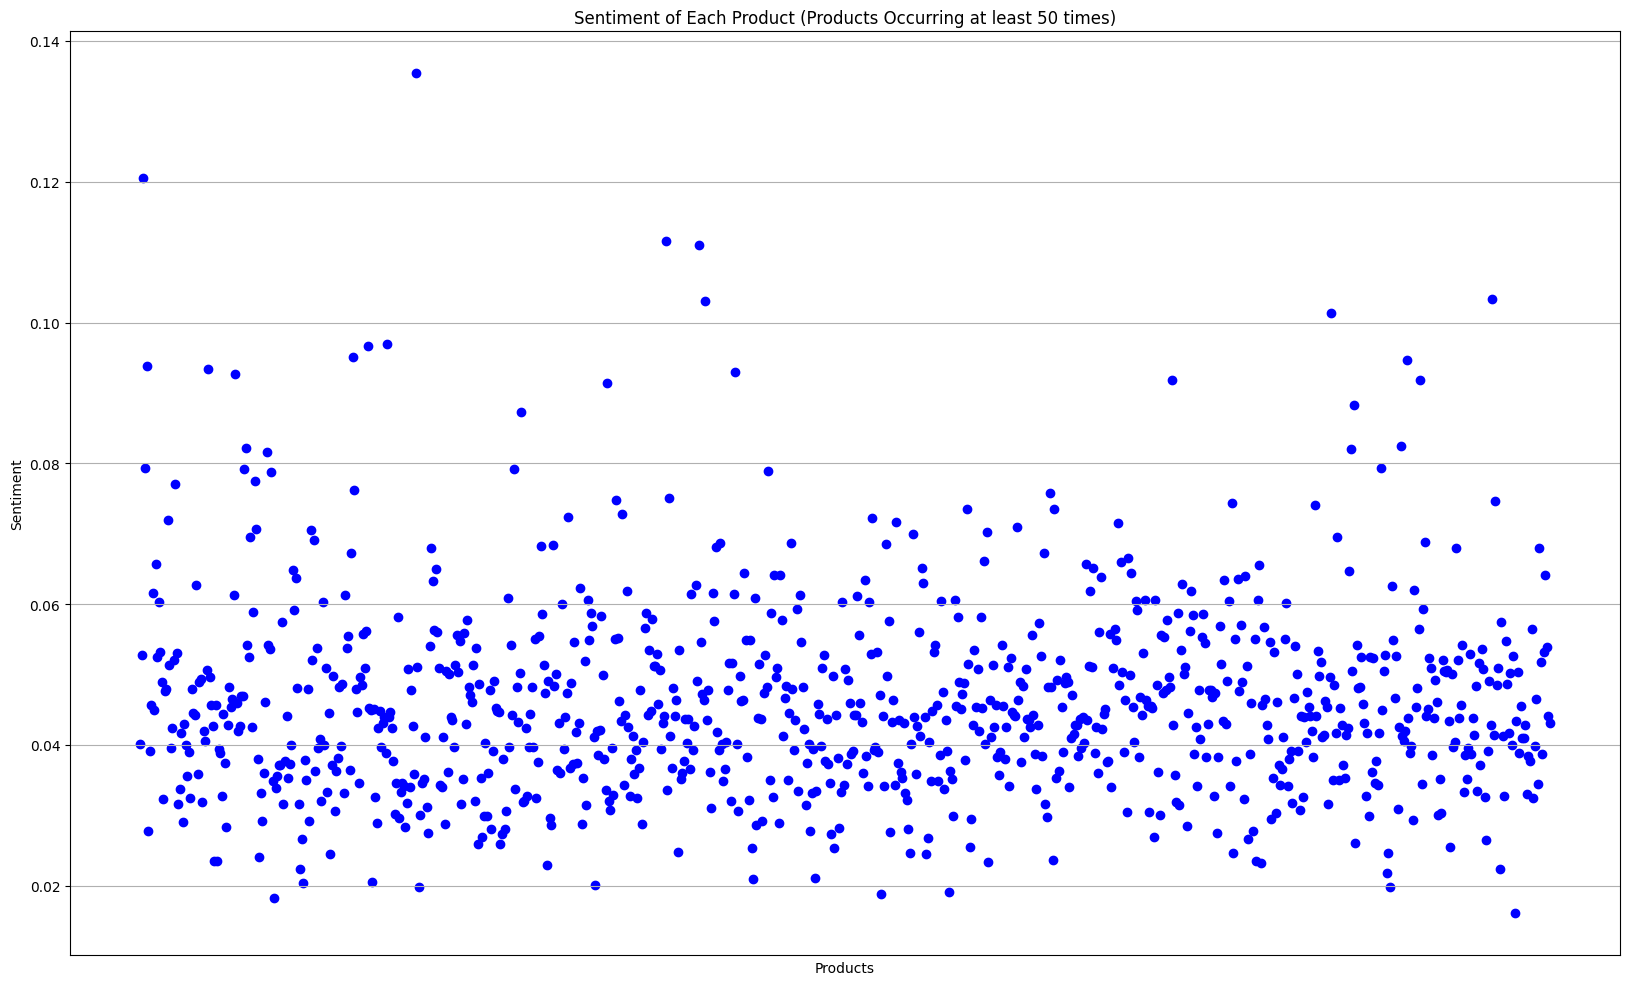

In [90]:
# Filter products occurring at least 10 times
product_counts = reviews_nltk['ProductId'].value_counts()
valid_products = product_counts[product_counts >= 50].index
reviews_filtered = reviews_nltk[reviews_nltk['ProductId'].isin(valid_products)]

# Calculate the mean score for each product
product_means = reviews_filtered.groupby('ProductId')['nltk_ct_sa_neg'].mean()

# Create a larger figure
plt.figure(figsize=(20, 12))

# Plot the mean score of each product as points without showing labels
plt.scatter(product_means.index, product_means.values, color='blue')

# Set labels and title
plt.xlabel('Products')
plt.ylabel('Sentiment')
plt.title('Sentiment of Each Product (Products Occurring at least 50 times)')
plt.grid(True)

# Hide x-axis labels
plt.xticks([])

plt.show()

In [94]:
print(reviews_nltk.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Id', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'DateTime', 'Popularity', 'Year',
       'binary_score', 'CleantText', 'Text_SWR', 'nltk_ct_sa_pos',
       'nltk_ct_sa_neg', 'nltk_ct_sa_neu', 'nltk_ct_sa'],
      dtype='object')
